# Binary Search Tests 

These are some of the tests that we did to verify that the decision boundary generated was, in fact, correctly generated. We did a similar test for the SVM classifier in the documentation notebook where we showed the red line which is the decision boundary generated by the function optimal_point(). 

Here we use logistic regression and show that the points chosen by the optimal_point() function have probabilities for each class around 50% which would show that these are, in fact, decision boundary points.

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numba
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import warnings
import random 
from scipy.spatial import KDTree
from sklearn.utils import resample

random.seed(0)
warnings.filterwarnings('ignore', category=UserWarning)

# Step: Import Files for Binary Search Optimal Method 

We import the necessary files needed to perform decision boundary tests. We test the generated decision boundaries for varying number of features, and we use logistic regression to ensure that the generated decision boundary aligns with the $50\%$ probabilities that we should expect for both classes.

In [25]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from files.binary_search_optimal_point import optimal_point
from files.binary_search_optimal_point import find_decision_boundary

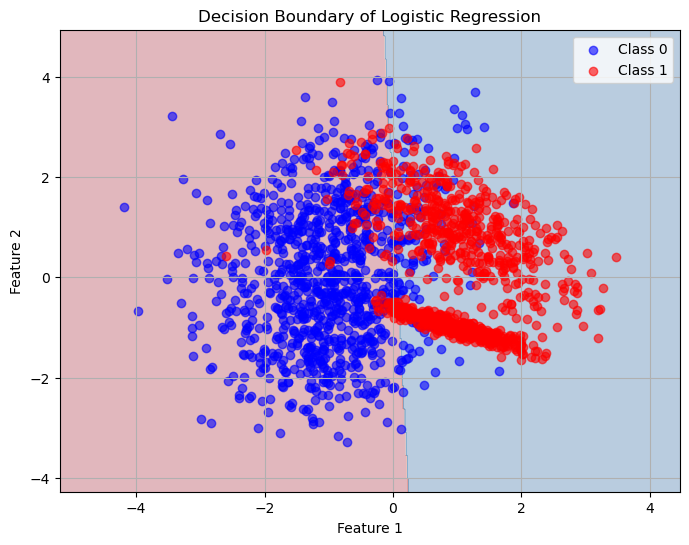

In [18]:
# Reading in the dataset
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
def visualize_dataset():
    clf = LogisticRegression().fit(X, y)
    # Step 2: Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                        np.linspace(y_min, y_max, 500))

    # Step 3: Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Step 4: Plot
    plt.figure(figsize=(8, 6))

    # Decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

    # Data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.6)

    # Labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_dataset()

In [19]:
clf = LogisticRegression()

In [20]:
def visualize_dataset():
    plt.figure(figsize=(8, 6))

    plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], color='blue', label='Class 0', alpha=0.5)
    plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='red', label='Class 1', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Binary Classification Data (2 Features)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
y = y.reshape(-1,1)
df1 = pd.DataFrame(data=np.hstack((X,y)))
optimal_point(df1, model=clf, desired_class=0, original_class=1, threshold=40000, chosen_row=1, point_epsilon=1e-6, epsilon=0.07)

c:\Users\Compuworld\drexel_research_2024_2025\Docs\files\common_functions.py:422: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_dataset = pd.concat([balanced_dataset, upsampled_class], ignore_index=True)


Class counts:
 2
1    1000
0    1000
Name: count, dtype: int64
Fitting model...
Model training complete.
boundary points started generation...
boundary points finished.
(40000, 2)
Finding the closest point from the contour line to the point...
Finding the closest point from the contour line to the point.
[[1.07091363 1.09238508]]
[[-1.17215313 -0.04879969]]


[-0.06817608263003239, 1.106479103738937]

In [11]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)
y = y.reshape(-1,1)
df1 = pd.DataFrame(data=np.hstack((X,y)))
df1.head(n=20)

,0,1,2
0,0.771440,-1.262335,0.0
1,-1.292116,-0.409111,0.0
2,-1.427221,1.619316,1.0
3,-1.862943,1.682255,1.0
4,1.326361,0.320554,0.0
5,-1.034796,1.110975,1.0
6,-1.993211,1.841957,1.0
7,-1.348937,-0.368258,0.0
8,-0.373500,0.298467,1.0
9,0.718320,-0.761266,0.0


In [13]:
optimal_point(df1, model=clf, desired_class=0, original_class=1, threshold=50000, chosen_row=5, point_epsilon=1e-4, epsilon=0.07)

c:\Users\Compuworld\drexel_research_2024_2025\Docs\files\common_functions.py:422: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_dataset = pd.concat([balanced_dataset, upsampled_class], ignore_index=True)


Class counts:
 2
0    5002
1    5002
Name: count, dtype: int64
Fitting model...
Model training complete.
boundary points started generation...
boundary points finished.
(50000, 2)
Finding the closest point from the contour line to the point...
Finding the closest point from the contour line to the point.
[[1.07514771 1.0714471 ]]
[[-0.20885958 -0.7404106 ]]


[-1.2593510571139028, 0.3176644994862098]

In [14]:
X, y = make_classification(n_samples=5000, n_features=51, n_informative=51, n_redundant=0, random_state=42, n_classes=2)
model = LogisticRegression()
y = y.reshape(-1,1)
df2 = pd.DataFrame(data=np.hstack((X,y)))

In [15]:
df2.head(n=20)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.889818,-0.825471,-0.210590,-2.856535,0.693125,-5.642883,13.209183,2.692199,2.754073,0.154228,...,4.763202,-8.303519,7.321253,3.601108,-0.558062,-1.212654,-1.164403,5.169363,2.574095,0.0
1,-0.533984,0.648952,5.596394,-1.086707,3.761104,-0.575370,0.717226,-0.937345,3.652855,-1.342487,...,-9.360450,4.785849,-1.701105,7.119621,2.658547,8.195286,-3.946856,3.000733,4.328823,0.0
2,2.033743,9.216104,0.312689,8.534617,3.320922,12.268958,4.130554,0.337084,-1.688427,4.053550,...,-0.178872,-3.389753,-1.872875,-1.069837,-0.570060,-4.019157,2.106338,-0.453622,8.896160,1.0
3,3.548917,-2.776485,-0.502533,-1.643888,-3.347425,-1.213385,-1.763432,4.233040,3.097054,1.838008,...,-5.090086,-2.142888,0.463514,5.350892,9.514657,1.502027,-6.088132,-1.611844,4.862071,0.0
4,1.836552,1.321849,1.110293,-1.874105,8.346437,-3.875414,6.787884,-8.278707,-4.424594,-1.511528,...,-2.231427,-2.255901,-3.239298,-6.304000,-0.982316,-0.314802,-0.314574,1.746531,-1.043861,0.0
5,-0.627999,-5.528049,7.192905,-9.926754,-2.221568,-2.418471,2.623397,-3.642304,9.030754,-10.775797,...,0.821346,-1.316148,-6.303034,-2.263331,-2.055183,-4.059419,8.829769,5.441648,-2.108828,0.0
6,5.248394,-2.663301,-1.746750,-5.692389,2.791261,8.984965,0.216811,-2.887568,3.045782,1.286896,...,2.215828,4.928237,-6.905289,-1.556822,6.876809,2.770610,-1.368626,2.599783,3.268692,1.0
7,1.314891,-3.624251,-0.361765,0.346872,-6.676465,-2.117156,4.612547,-6.950891,-1.690517,-2.652964,...,-1.707671,13.285689,-3.387991,7.707082,-3.304093,-2.604836,-3.185184,-8.098049,5.171999,0.0
8,-2.734525,3.440586,0.533125,-3.387532,-1.106004,5.480290,1.794000,-7.370089,-6.214151,-3.343983,...,1.969268,2.412086,0.799031,5.125025,-5.037852,-10.174208,4.286708,-8.222617,4.057116,0.0
9,2.385793,-4.917558,4.217357,-1.185870,-1.121265,-2.119290,2.136316,2.974162,-5.493993,5.880466,...,5.879503,-3.585599,-6.478724,0.132547,-4.884468,-4.336502,2.260819,-1.775854,-1.839208,0.0


In [21]:
X, y = make_classification(n_samples=2000, n_features=15, n_informative=15, n_redundant=0, random_state=42, n_classes=2)
model = LogisticRegression()
y = y.reshape(-1,1)
model.fit(X,y)
df = pd.DataFrame(data=np.hstack((X,y)))
X_train, y_train = df.iloc[:, 0:df.shape[1]-1], df.iloc[:, -1]
boundary_points = find_decision_boundary(model, X_train, y_train, threshold=100000, epsilon=0.001)

# Print the decision bo un dary points
print("Decision Boundary Points (All Features):")  
print(boundary_points)
print(boundary_points.shape)

Decision Boundary Points (All Features):
             0         1         2         3         4         5         6   \
0     -1.553842  0.234635  0.390145  0.427931 -2.016512  2.306642 -0.771652   
1      0.539959 -2.326015  1.102638  1.927911  1.608431  0.418089 -1.934013   
2     -2.938586 -3.252318  4.100921  1.431128  0.347166  1.147726 -1.491709   
3     -0.382735 -5.704516  0.129108 -2.883924 -1.165873 -1.093516 -0.582119   
4      0.773362 -2.693755  2.613882 -2.248338  0.294158 -2.865348 -1.338886   
...         ...       ...       ...       ...       ...       ...       ...   
99995  2.689592  1.075895  1.010809 -0.456985  0.544903  0.977409  0.203787   
99996 -1.803760 -0.423503  0.504871 -0.435535  1.506000  0.413396  0.144171   
99997 -1.929867  0.045599  0.746824 -1.507452  1.697358  0.103158 -2.760255   
99998  3.089083  0.218242  0.571421  0.262346  1.591516 -1.889181 -2.106543   
99999 -1.047434  1.593997  1.198445 -1.716853  1.901675 -0.561544 -0.103180   

          

In [22]:
preds = model.predict_proba(boundary_points)
print(np.mean(preds, axis=0))

[0.50000077 0.49999923]


In [23]:
X, y = make_classification(n_samples=2000, n_features=50, n_informative=50, n_redundant=0, random_state=42, n_classes=2)
model = LogisticRegression()
y = y.reshape(-1,1)
model.fit(X,y)
df = pd.DataFrame(data=np.hstack((X,y)))
X_train, y_train = df.iloc[:, 0:df.shape[1]-1], df.iloc[:, -1]
boundary_points = find_decision_boundary(model, X_train, y_train, threshold=100000, epsilon=0.001)

# Print the decision bo un dary points
print("Decision Boundary Points (All Features):")  
print(boundary_points)
print(boundary_points.shape)

Decision Boundary Points (All Features):
             0         1         2         3         4         5         6   \
0      1.026535  2.861983 -0.860304 -3.610834  2.404988 -4.398020  3.637979   
1      1.188456 -1.972356  1.545695 -4.936462 -3.280567 -1.093413  2.378605   
2     -2.665283 -3.645295  4.551886 -3.634087 -1.999097  1.212715  2.265579   
3      1.755699 -1.655137  1.283611 -0.836769  0.960693 -0.658652 -2.576207   
4     -0.467101  4.289869 -4.577360 -1.289462  3.210461 -1.869537  4.501311   
...         ...       ...       ...       ...       ...       ...       ...   
99995  1.289651 -1.805332  2.010795 -1.563351  1.630041  7.594958  1.512225   
99996  5.457919 -2.265865  2.903049 -3.768424 -2.506676  6.602279  5.313959   
99997  0.279863 -0.539277  3.166644  0.309774 -4.706356 -2.140737  4.679321   
99998  5.507781 -1.993400  2.812904 -3.758450 -2.416712  6.497102  5.386354   
99999 -5.798140  4.240146 -1.748495  4.132670  4.475575  0.115260 -2.362200   

          

In [24]:
preds = model.predict_proba(boundary_points)
print(np.mean(preds, axis=0))

[0.50000043 0.49999957]
